In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

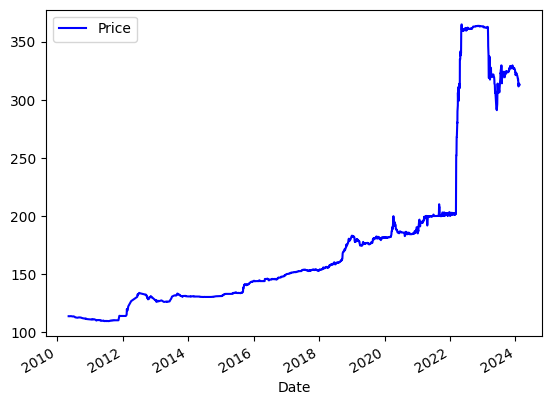

In [ ]:
df = pd.read_csv("/content/exchangerate.csv")
df['Date'] = pd.to_datetime(df['Date'])
###plot to check the data pattern
# create a line plot
df.plot(kind='line', x='Date', y='Price', color='Blue')
df=df['Price']

In [ ]:
df.shape

(2872,)

In [ ]:
#Preprocessing data set
df = np.array(df).reshape(-1,1)

In [ ]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [ ]:
print(df)

[[0.01659928]
 [0.01633175]
 [0.01655188]
 ...
 [0.79891955]
 [0.79792621]
 [0.79684082]]


In [ ]:
#Training and test sets
train = df[:2400]
test = df[2400:]

print(train.shape)
print(test.shape)

(2400, 1)
(472, 1)


In [ ]:
def get_data(data, look_back):
  datax, datay = [],[]
  for i in range(len(data)-look_back-1):
    datax.append(data[i:(i+look_back),0])
    datay.append(data[i+look_back,0])
  return np.array(datax) , np.array(datay)

In [ ]:
look_back = 1

x_train , y_train = get_data(train, look_back)
print(x_train.shape)
print(y_train.shape)

(2398, 1)
(2398,)


In [ ]:
x_test , y_test = get_data(test,look_back)
print(x_test.shape)
print(y_test.shape)

(470, 1)
(470,)


In [ ]:
#Processing train and test sets for LSTM model
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)


In [ ]:
n_features=x_train.shape[1]
model=Sequential()
model.add(LSTM(64,activation='tanh',input_shape=(1,1)))
model.add(Dense(8, 'linear'))
model.add(Dense(n_features))

In [ ]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 64)                16896     
                                                                 
 dense_42 (Dense)            (None, 8)                 520       
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Compiling
model.compile(optimizer='adam', loss ='mae',metrics=[RootMeanSquaredError(),'mse'])

In [ ]:
#Training
model.fit(x_train,y_train, epochs = 15, batch_size=10)

Epoch 1/5
240/240 [==============================] - 3s 3ms/step - loss: 0.0268 - root_mean_squared_error: 0.0511 - mse: 0.0026
Epoch 2/5
240/240 [==============================] - 1s 4ms/step - loss: 0.0022 - root_mean_squared_error: 0.0031 - mse: 9.6414e-06
Epoch 3/5
240/240 [==============================] - 1s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0026 - mse: 6.9072e-06
Epoch 4/5
240/240 [==============================] - 1s 4ms/step - loss: 0.0018 - root_mean_squared_error: 0.0027 - mse: 7.2287e-06
Epoch 5/5
240/240 [==============================] - 1s 3ms/step - loss: 0.0015 - root_mean_squared_error: 0.0025 - mse: 6.3848e-06


In [ ]:
###Predicted Data
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred[150:])




15/15 [==============================] - 0s 2ms/step


In [ ]:
y_pred.shape

(320, 1)

In [ ]:
#Processing test shape ## Actual Data
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test[150:])


In [ ]:
y_test.shape

(320, 1)

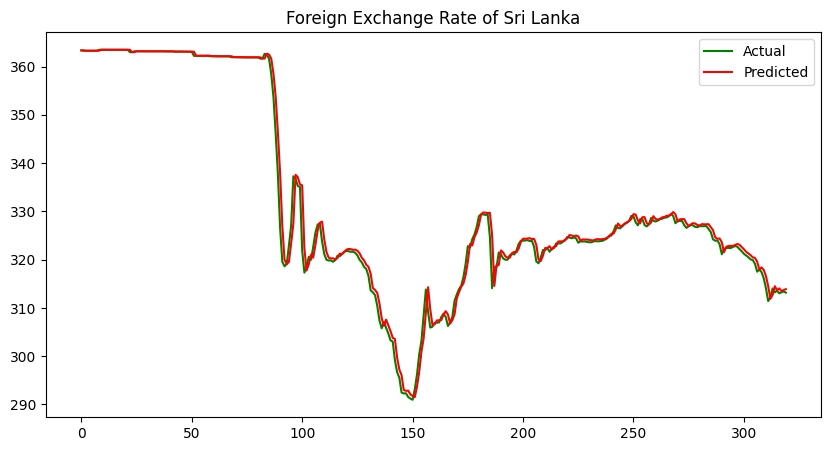

In [ ]:
#Visualizing the results
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of Sri Lanka')
plt.plot(y_test, label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

75/75 [==============================] - 0s 2ms/step


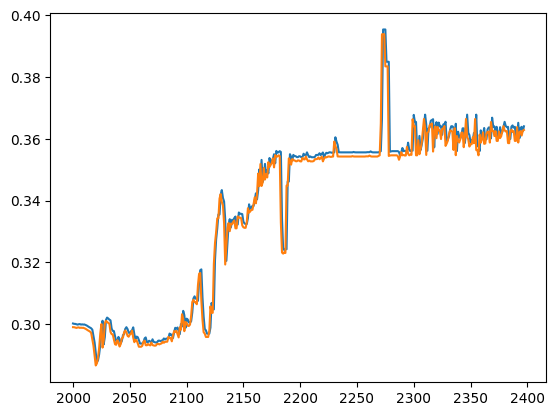

In [ ]:
import matplotlib.pyplot as plt
train_predictions = model.predict(x_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})


plt.plot(train_results['Train Predictions'][2000:])
plt.plot(train_results['Actuals'][2000:])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

3.9765219869638515